# Tapşırıq 15.

## Bildiyiniz kimi, keçən il Azgranata şirkəti ilə tərəfdaşlıq müqaviləsi imzaladıq ki, bu müqaviləyə əsasən ötən il mağazalarımızda VITA 1000 şirələrinin satışını həyata keçirdik. Bu ilki sifariş sayını müəyyənləşdirmək üçün ötən ilki məlumatlardan istifadə labüddür, zəhmət olmasa Meyvə Şirələri kateqoriyası üzrə ümumi satışın neçə faizinin VITA 1000 şirələrinin payına düşdüyünü piechart şəklində göstərin. Lakin diqqətli olun, digər məhsulların daxilində də VITA sözü mövcud olduğundan yanlış nəticə ola bilər, bizə yalnız VITA 1000 şirələrinin satış faizi gərəklidir.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("esas_mehsullar.csv")
df = data.copy()
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [3]:
df.isnull().sum()

column_a                  0
satish_kodu               0
mehsul_kodu               0
mehsul_ad               771
mehsul_kateqoriya         0
mehsul_qiymet           771
satish_tarixi             0
endirim_kompaniya    220929
bonus_kart                0
magaza_ad                 0
magaza_lat                0
magaza_long               0
magaza_location           0
dtype: int64

In [4]:
# çatışmayan verilənləri silmək

df.dropna(subset=["mehsul_ad","mehsul_qiymet"], inplace = True)

In [5]:
df.isnull().sum()

column_a                  0
satish_kodu               0
mehsul_kodu               0
mehsul_ad                 0
mehsul_kateqoriya         0
mehsul_qiymet             0
satish_tarixi             0
endirim_kompaniya    220560
bonus_kart                0
magaza_ad                 0
magaza_lat                0
magaza_long               0
magaza_location           0
dtype: int64

In [6]:
df["mehsul_kateqoriya"].unique()

array(['Məişət məhsulları', 'Qab-qacaq', 'Meyvə Şirələri', 'Kompotlar',
       'Turşular', ' Kofe, kakao və s. ', 'Şirniyyat', 'Şərablar',
       'Yağlar', 'Quru meyvə paketli', 'Ayaqqabı ləvazimatları',
       ' Yuyucu, təmizləyicilər ', 'Tütün məhsulları', 'Ədviyyatlar',
       'Kolbasa və sosislər', 'Araq', 'Diabetik', 'Dənlilər',
       'Plastik qablar', 'Qab yumaq üçün', 'Enerji içkiləri',
       'Qatılaşdırılmış süd', 'Corablar', 'Bayram aksessuarları', 'Sular',
       'Paltarlar üçün', 'Un məmulatları', 'Quru meyvələr', 'Dondurma',
       'Yogurt', 'Tekstil', 'Çörək', 'Pendirlər', 'Çay', 'Кəsmik', 'Xama',
       'Pivələr', 'Konservlər', 'Meyvə', 'Unlar', 'Qatıq',
       'Konservləşdirilmiş tərəvəz', ' Viski,tekila və s. ', 'Souslar',
       'Saqqızlar', 'Batareya', 'Soyuq Çaylar', 'Tərəvəz',
       'Həşəratlara qarşı', 'Kefir', 'Qaymaq', 'Şor', 'Kolalar', 'Avto',
       'Süd', 'Kokteyllər', 'Konyak', 'Zeytunlar', 'Ayran',
       'Hazır yeməklər', 'Səhər yeməkləri', 'Şampan', 'Do

In [7]:
# meyvə şirələri kateqoriyası

meyvesire_df = df[df["mehsul_kateqoriya"] == "Meyvə Şirələri"]

In [8]:
meyvesire_df

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
8,8,583812,6131,LUCK SIAM 565GR ANANAS DILIMLERI SIROPDA D/Q,Meyvə Şirələri,3.05,2019-04-29T03:20:00,NaN,True,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
90,90,980107,6411,VITA 0.25LT PREMIUM SAFTALI SIRESI,Meyvə Şirələri,1.45,2019-01-15T02:48:00,NaN,False,N.Nərimanov,40.396347,49.872752,POINT(49.872752 40.396347)
93,93,980107,2911,EARLY SPRING 290ML QARAGILE ETIRLI S/Q,Meyvə Şirələri,1.90,2019-01-15T02:48:00,Yeni il fürsətləri,False,N.Nərimanov,40.396347,49.872752,POINT(49.872752 40.396347)
109,109,699800,5467,QIZIL QUYU 500ML LIMONAD UZUM S/Q,Meyvə Şirələri,1.00,2019-06-24T00:23:00,NaN,False,M. Əcəmi,40.394620,49.836660,POINT(49.83666 40.39462)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438682,438682,604355,5438,"LAYMON FRESH 0,5LT LIGHT PL/Q",Meyvə Şirələri,1.15,2019-02-17T23:30:00,NaN,False,Yeni Yasamal,40.393613,49.790698,POINT(49.7906977 40.3936129)
438754,438754,416392,9698,SAN-SLAVIA 500ML LIMONAD GREYPFRUT S/Q,Meyvə Şirələri,2.00,2019-01-22T15:08:00,Yeni il fürsətləri,False,Həzi Aslanov-2,40.372750,49.838400,POINT(49.8384 40.37275)
438758,438758,669902,6020,VITA 1000 200ML MULTI MEYVE SIRESI S/Q,Meyvə Şirələri,0.65,2019-06-07T08:30:00,NaN,True,Xırdalan,40.459728,49.719754,POINT(49.719754 40.459728)
438789,438789,995231,4209,YA 200ML SAFTALI SIRESI,Meyvə Şirələri,0.68,2019-06-26T18:30:00,NaN,True,Badamdar,40.332686,49.799567,POINT(49.7995673 40.3326856)


In [9]:
# VİTA 1000 şirələri datası

vitamin_df = meyvesire_df[meyvesire_df["mehsul_ad"].transform(lambda x: x.str.startswith("VITA 1000")) == True]

In [10]:
vitamin_df

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
1068,1068,814351,8983,VITA 1000 200ML PORTAGAL MEYVE SIRESI,Meyvə Şirələri,0.38,2019-08-14T16:57:00,Sərin Yay günləri,False,Yeni Yasamal,40.393613,49.790698,POINT(49.7906977 40.3936129)
2020,2020,334840,8983,VITA 1000 200ML PORTAGAL MEYVE SIRESI,Meyvə Şirələri,0.38,2019-07-05T06:54:00,Sərin Yay günləri,False,Yeni Yasamal,40.393613,49.790698,POINT(49.7906977 40.3936129)
2986,2986,417712,6783,VITA 1000 1LT Q.QARAQAT MEYVE SIR S/Q,Meyvə Şirələri,1.78,2019-08-22T00:26:00,Sərin Yay günləri,False,M. Əcəmi,40.394620,49.836660,POINT(49.83666 40.39462)
3117,3117,291905,2319,VITA 1000 1LT ALBALI MEYVE SIRESI S/Q,Meyvə Şirələri,1.78,2019-05-18T04:36:00,S?rf?li Yaz,True,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
3185,3185,783884,3291,VITA 1000 200ML YASIL ALMA MEYVE SIRESI,Meyvə Şirələri,0.38,2019-09-09T14:31:00,NaN,False,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435143,435143,670385,4267,VITA 1000 200ML ALBALI SIRESI S/Q,Meyvə Şirələri,0.65,2019-09-24T07:56:00,Payız endirimləri,False,M. Əcəmi,40.394620,49.836660,POINT(49.83666 40.39462)
435177,435177,650736,8048,VITA 1000 1LT SAFTALI MEYVE SIRESI,Meyvə Şirələri,1.54,2019-07-18T13:40:00,Sərin Yay günləri,True,Əhmədli,40.386546,49.957536,POINT(49.9575364 40.3865459)
435570,435570,836686,2319,VITA 1000 1LT ALBALI MEYVE SIRESI S/Q,Meyvə Şirələri,1.78,2019-05-29T10:15:00,S?rf?li Yaz,True,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)
435711,435711,365178,9452,VITA 1000 1LT ALMA YASIL MEYVE SIRESI,Meyvə Şirələri,1.54,2019-06-02T19:00:00,NaN,True,8 mkr,40.418977,49.838141,POINT(49.838141 40.418977)


In [11]:
# meyvə şirələri kateqoriyası üzrə ümumi satış məbləği

meyvesire_df["mehsul_qiymet"].sum()

35742.28

In [12]:
# VİTA 1000 şirələrinin satış məbləği

vitamin_df["mehsul_qiymet"].sum()

1058.97

In [13]:
# faizlə göstərmək

print("Cavab: %.2f" % ((vitamin_df["mehsul_qiymet"].sum() * 100) / meyvesire_df["mehsul_qiymet"].sum()), "%")

Cavab: 2.96 %


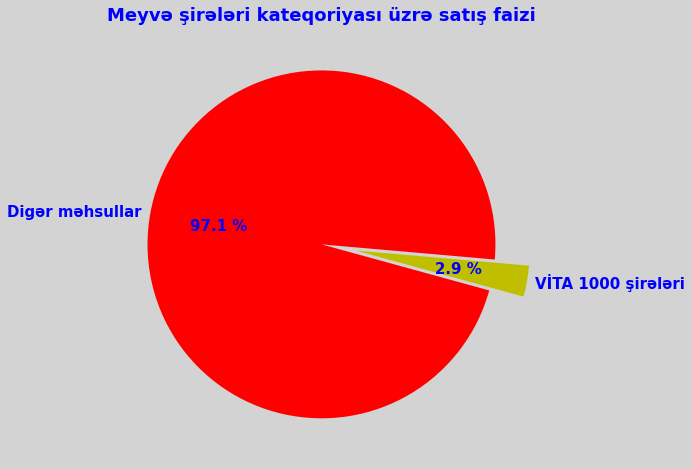

In [14]:
# qrafik

labels = "Digər məhsullar", "VİTA 1000 şirələri"
sizes = [meyvesire_df["mehsul_qiymet"].sum(), vitamin_df["mehsul_qiymet"].sum()]
explode = (0,0.2)

fig, ax = plt.subplots(figsize = (10,8))
plt.title("Meyvə şirələri kateqoriyası üzrə satış faizi", {"fontsize" : 18,"fontweight" : "bold", "color" : "b"})

plt.pie(sizes, explode=explode, labels = labels,
        autopct='%1.1f %%', colors = ["r","y"], labeldistance=1.05, startangle = 355,
        textprops={'color':"b","fontsize" : 15, "fontweight":"bold"});

fig.set_facecolor("lightgrey")

plt.savefig("qrafik.png",dpi = 80, facecolor = "lightgrey", bbox_inches = "tight")